<a href="https://colab.research.google.com/github/Jalpapatel12/devnet-practice/blob/master/Logistic_Regression_Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv')

In [ ]:
display(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### Data Manipulation

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df = diabetes.drop(['Pregnancies','Outcome'], axis = 1)

In [ ]:
diabetes_df.replace(0, np.nan, inplace = True)

In [ ]:
diabetes_df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
diabetes_df.shape

(768, 7)

In [ ]:
diabetes_df['Insulin'].replace(np.nan, np.round(diabetes_df['Insulin'].mean()), inplace = True)

In [ ]:
np.round(diabetes_df['Insulin'].mean())

156.0

##### Impute Method

In [ ]:
from sklearn.impute import SimpleImputer
# strategy = 'mean','median','most_frequent'
imputer = SimpleImputer(strategy = 'median')

In [ ]:
X_data = imputer.fit_transform(diabetes_df)
X_data

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
diabetes_df2 = pd.DataFrame(X_data, columns = diabetes_df.columns)
diabetes_df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
diabetes_df2['Pregnancies'] = diabetes.Pregnancies
diabetes_df2['Outcome'] = diabetes.Outcome

In [ ]:
diabetes_df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1


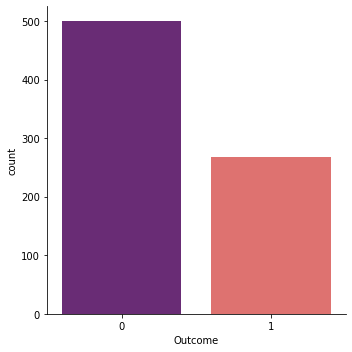

In [ ]:
sns.catplot(x = 'Outcome', kind = 'count', data = diabetes_df2, palette = 'magma')

##### Data Augmentation
    * To regenerate input data for training samples.

In [ ]:
diabetes_df2['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from sklearn.utils import resample

df_0 = diabetes_df2[diabetes_df2['Outcome'] == 0]
df_1 = diabetes_df2[diabetes_df2['Outcome'] == 1]

In [ ]:
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state = 123)

In [ ]:
# Merge
diabetes_df3 = pd.concat([df_0, df_1_upsample])

##### Correlation

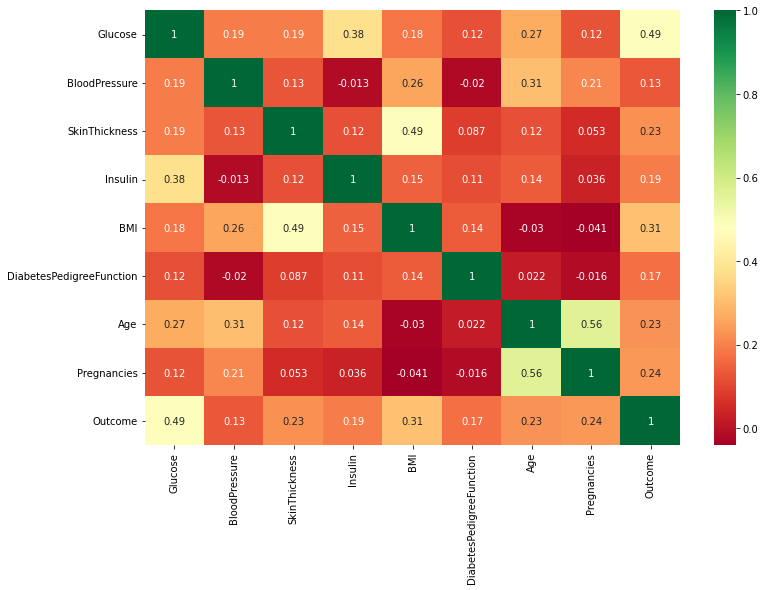

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(diabetes_df3.corr(), annot = True, cmap = 'RdYlGn')

In [ ]:
X = diabetes_df3.drop(['Outcome'], axis = 1)
Y = diabetes_df3['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# l1 - Regularization to avoid overfitting of model logistic regression
logit_model = LogisticRegression(solver = 'liblinear',max_iter=1e9, C = 1e7, penalty='l1')

In [ ]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=10000000.0, max_iter=1000000000.0, penalty='l1',
                   solver='liblinear')

In [ ]:
# Accuracy
logit_model.score(X_test, Y_test)

0.785

##### Classification Metrics

In [ ]:
yhat = logit_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, yhat)

array([[77, 19],
       [24, 80]])

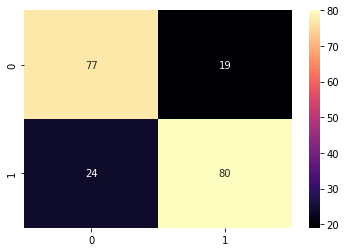

In [ ]:
sns.heatmap(confusion_matrix(Y_test, yhat),annot = True, cmap='magma')

In [ ]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        96
           1       0.81      0.77      0.79       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200

